person nr. 1
person nr. 4
person nr. 7
person nr. 10
person nr. 13
person nr. 16
person nr. 19
person nr. 2
person nr. 8
person nr. 11
person nr. 17
person nr. 20
person nr. 24
person nr. 25
person nr. 3
person nr. 6
person nr. 9
person nr. 12
person nr. 15
person nr. 18
person nr. 21


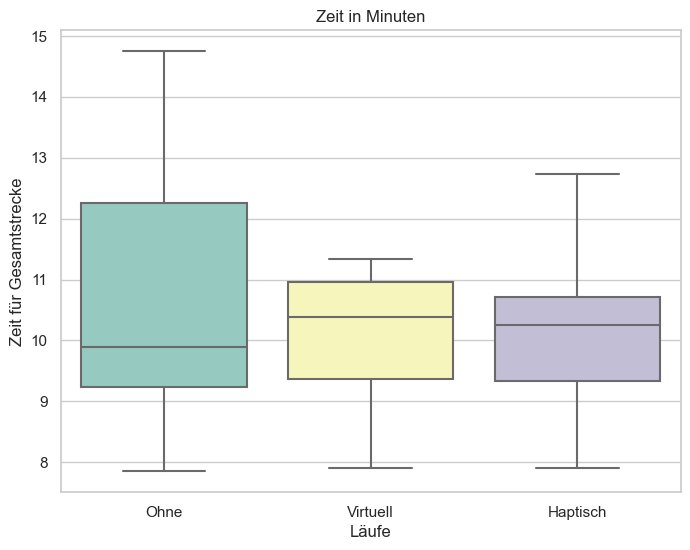

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

idsReference = [1,4,7,10,13,16,19] # broken runs 22
idsVirtual = [2,8,11,17,20,24,25] #broken runs 5,14
idsHaptic = [3,6,9,12,15,18,21] #broken runs 23,26

def visualizeTotalTime(data):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen

    sns.boxplot(data=data, palette="Set3")  # "Set3" ist ein Farbschema
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'])  # Beschriftungen für die Boxplots
    plt.xlabel("Läufe")
    plt.ylabel("Zeit für Gesamtstrecke")
    plt.title("Zeit in Minuten")
    plt.savefig('../Visualisierungen/gesamtzeiten.png', dpi=300)
    plt.show()

def analyseTimeToComplete(ids):
    timestocomplete = []
    for n in ids:
        print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        starttime = df['TimeStamp_Unix'].min()
        endtime = df['TimeStamp_Unix'].max()
        
        timetocomplete = endtime - starttime
        timestocomplete.append(timetocomplete / 60)
    return timestocomplete

timesref = analyseTimeToComplete(idsReference)
timesvirt = analyseTimeToComplete(idsVirtual)
timeshapt = analyseTimeToComplete(idsHaptic)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTotalTime(timedf)

[81, 50, 53, 55, 78, 68, 45]
[58, 51, 84, 48, 72, 76, 72]
[65, 67, 57, 78, 59, 49, 64]


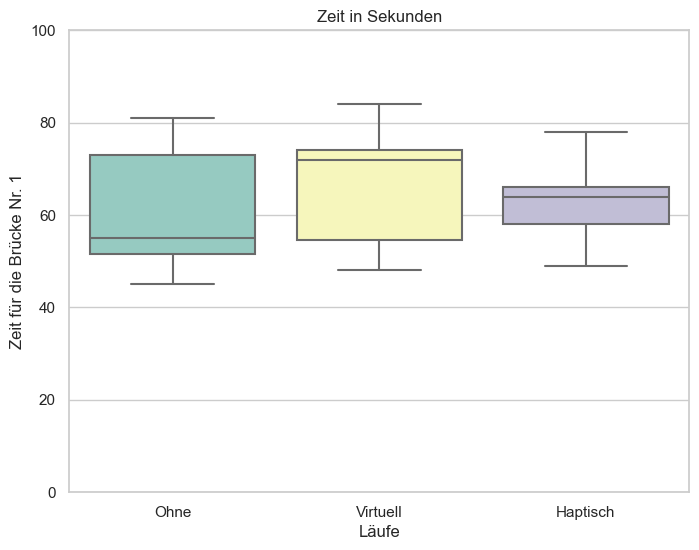

[96, 63, 63, 72, 87, 80, 56]
[81, 70, 85, 60, 84, 72, 79]
[84, 96, 72, 83, 73, 59, 76]


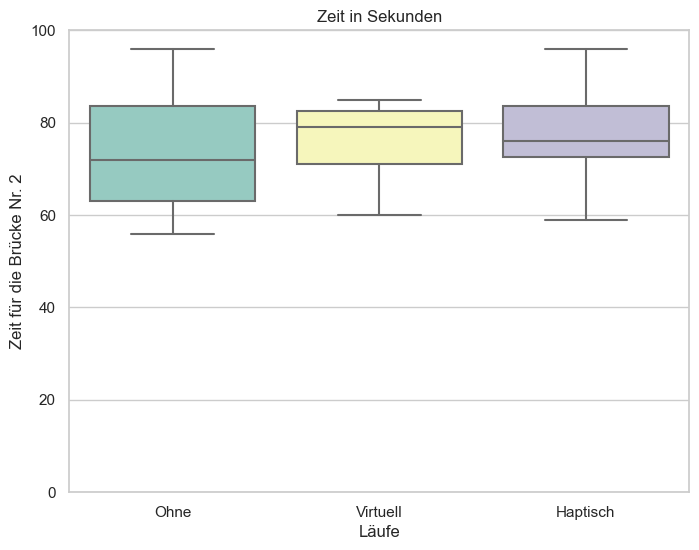

[18, 18, 14, 15, 17, 19, 12]
[14, 44, 28, 16, 15, 17, nan]
[15, 17, 16, 18, 15, 29, 14]


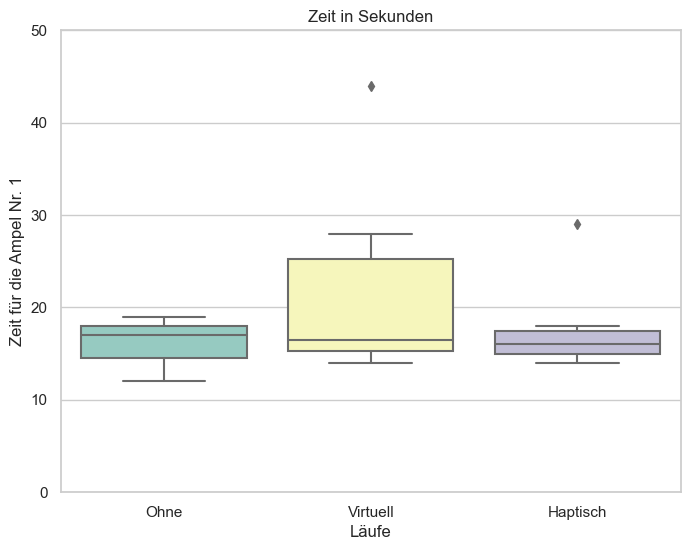

[20, 13, 13, 25, 21, 18, 13]
[13, 13, 19, 11, 16, 15, 33]
[15, 16, 13, 17, 16, 19, 28]


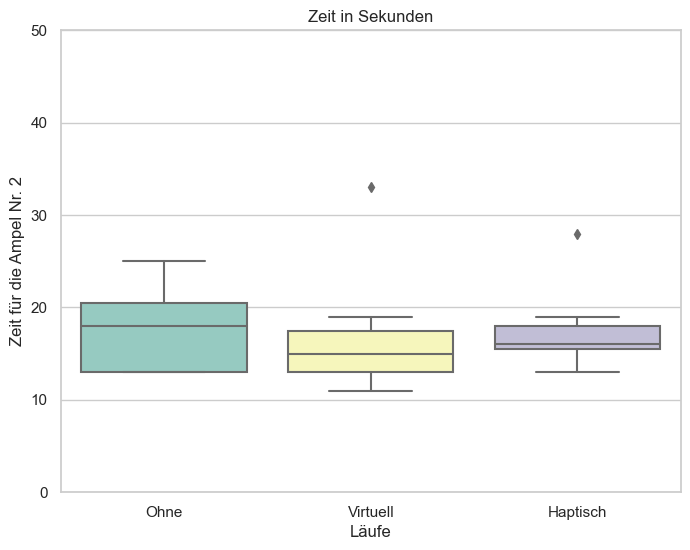

In [15]:
import numpy as np

def visualizeTime(data, nr, name, name2, limit):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))  # Größe des Plots festlegen

    ax = sns.boxplot(data=data, palette="Set3")  # "Set3" ist ein Farbschema
    ax.set_ylim(0,limit)
    plt.xticks([0, 1, 2], ['Ohne', 'Virtuell', 'Haptisch'])  # Beschriftungen für die Boxplots
    plt.xlabel("Läufe")
    plt.ylabel("Zeit für die " + name2 + " Nr. " + str(nr))
    plt.title("Zeit in Sekunden")
    plt.savefig('../Visualisierungen/zeiten_' + name + '_' + str(nr) + '.png', dpi=300)
    plt.show()

def analyseTime(ids, begin, end):
    timestocomplete = []
    for n in ids:
        #print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        
        startBridge_1_df = df.groupby([begin, end])
        for group_value, group_data in startBridge_1_df:
            if group_value == (True, False): #Begin of Bridge triggered, but end not
                starttime = group_data['TimeStamp_Unix'].min()
                endtime = group_data['TimeStamp_Unix'].max()
        
                timetocomplete = endtime - starttime
                timestocomplete.append(timetocomplete)
    return timestocomplete

timesref = analyseTime(idsReference, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerBeginBridge1_Status', 'TriggerEndBridge1_Status')

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 1, 'bruecke', 'Brücke', 100)

timesref = analyseTime(idsReference, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')

print(timesref)
print(timesvirt)
print(timeshapt)


timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 2, 'bruecke', 'Brücke', 100)

timesref = analyseTime(idsReference, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerOverlapStreetCrossing1_Status', 'TriggerEndCrossing1_Status')

max_len = max(len(timesref), len(timesvirt), len(timeshapt))

timesref.extend([np.nan] * (max_len - len(timesref)))
timesvirt.extend([np.nan] * (max_len - len(timesvirt)))
timeshapt.extend([np.nan] * (max_len - len(timeshapt)))

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 1, 'crossing', 'Ampel', 50)

timesref = analyseTime(idsReference, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')
timesvirt = analyseTime(idsVirtual, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')
timeshapt = analyseTime(idsHaptic, 'TriggerOverlapStreetCrossing2_Status', 'TriggerEndCrossing2_Status')

print(timesref)
print(timesvirt)
print(timeshapt)

timedf = pd.DataFrame({"referenz":timesref,
    "virtuell":timesvirt,
    "haptisch":timeshapt})

visualizeTime(timedf, 2, 'crossing', 'Ampel', 50)

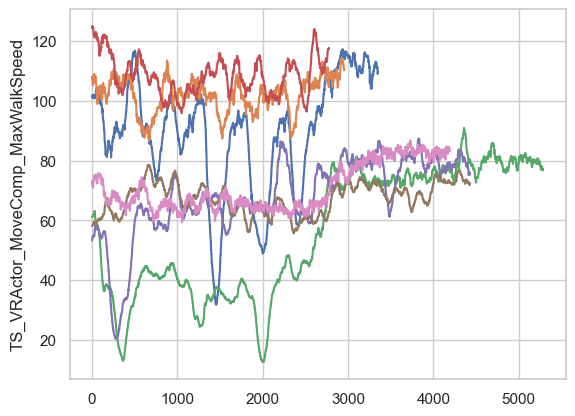

1361006.434986
2607
74.57978163110307
divsum 27415
divsum 9166
80.42065321361554
90.99574604939468
74.57978163110306


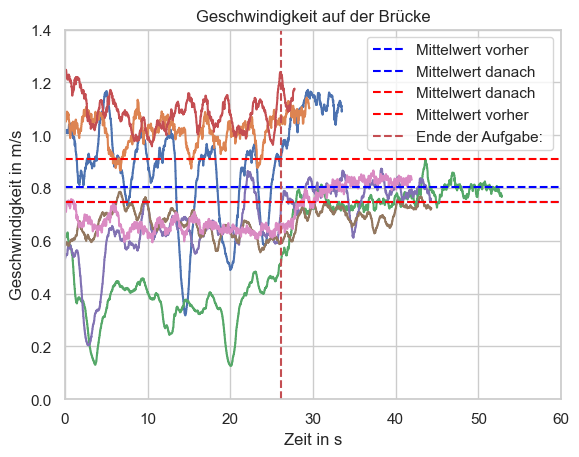

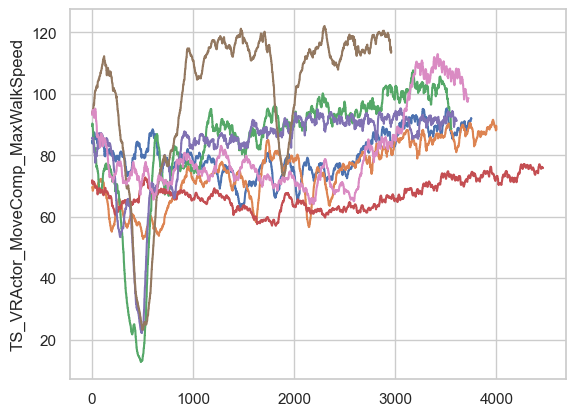

1411934.749751
2604
77.45966369053104
divsum 26067
divsum 7839
87.46744582587064
92.35826675401368
77.45966369053106


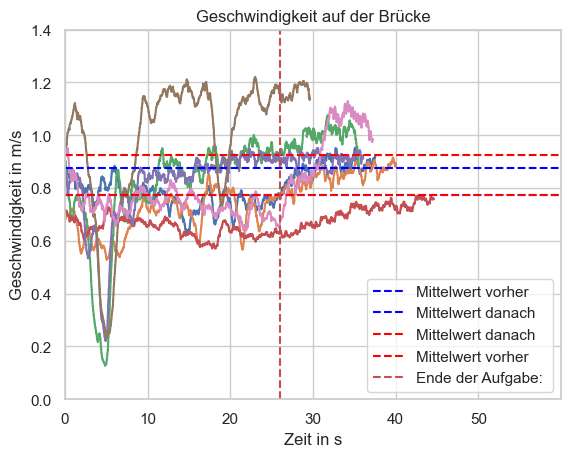

done


In [142]:
import numpy as np

def analyseVelocity(ids, begin, end):
    velocities = [0,1,2,3,4,5,6]
    nr = 0
    
    for n in ids:
        #print('person nr. ' + str(n))
        filepath = '../Versuchsdaten_vorverarbeitet/' + str(n) + '/dynamicrun.csv'
        
        if not os.path.isfile(filepath):
            print('No data to read nr. ' + str(n))
            continue
        df = pd.read_csv(filepath, sep=';')
        
        startBridge_1_df = df.groupby([begin, end])
        for group_value, group_data in startBridge_1_df:
            if group_value == (True, False): #Begin of Bridge triggered, but end not
                #TS_VRActor_MoveComp_MaxWalkSpeed
                #sns.lineplot(data=group_data['Tablet_menu_index'])
                sns.lineplot(data=group_data['TS_VRActor_MoveComp_MaxWalkSpeed'])
                velocities[nr] = group_data.copy()
                #print(len(velocities[nr]))
                #starttime = group_data['TS_VRActor_MoveComp_MaxWalkSpeed'].min()
                #endtime = group_data['TS_VRActor_MoveComp_MaxWalkSpeed'].max()
                #print(starttime)
                #print(endtime)
        nr += 1
    plt.show()
    return velocities

def mergeVelocity(velocities):
    combined_df = pd.DataFrame()
    sync_value = 0
    start_index = 0
    
    for df in velocities:
        start_index = df.index[0]
        print('Start index:' + str(start_index))
        
        sync_rows = df[df['Tablet_menu_index'] == sync_value]

        if sync_rows.empty:
            print('error, empty sync')
            continue
            
        sync_index = sync_rows.index[0]
        
        print('Sync Index:' + str(sync_index))

        # Wählen Sie alle Zeilen ab dem Startindex aus
        selected_rows = df.loc[start_index:]
        
        # Fügen Sie die ausgewählten Zeilen in das kombinierte DataFrame ein
        #combined_df = pd.concat([combined_df, selected_rows], ignore_index=True)
    #print(combined_df)
    
def mergeVelocity2(velocities):
    sync_value = 0
    sync_rows = velocities[0][velocities[0]['Tablet_menu_index'] == sync_value]
    sync_index = sync_rows.index[0]
    
    #merged_df = pd.concat(velocities, axis=0, ignore_index=False)
    
    merged_df = pd.DataFrame()

    # Führen Sie die DataFrames zusammen und fügen Sie die Daten in separate Spalten ein
    for i, df in enumerate(velocities, start=0):
        # Benennen Sie die 'data'-Spalte in 'data_i' um, wobei i der Index des DataFrames ist
        df.rename(columns={'TS_VRActor_MoveComp_MaxWalkSpeed': f'data_{i}'}, inplace=True)

        # Fügen Sie den DataFrame in das kombinierte DataFrame ein
        merged_df = pd.concat([merged_df, df], axis=1)
    
    sns.lineplot(data=merged_df['data_0'])
    sns.lineplot(data=merged_df['data_1'])
    sns.lineplot(data=merged_df['data_2'])
    sns.lineplot(data=merged_df['data_3'])
    sns.lineplot(data=merged_df['data_4'])
    sns.lineplot(data=merged_df['data_5'])
    sns.lineplot(data=merged_df['data_6'])
    
    # Den Index festlegen, bis zu dem der Mittelwert berechnet werden soll
    index_cutoff = sync_index
    
    sum = 0.0
    sum += merged_df.iloc[:index_cutoff]['data_0'].sum()
    sum += merged_df.iloc[:index_cutoff]['data_1'].sum()
    sum += merged_df.iloc[:index_cutoff]['data_2'].sum()
    sum += merged_df.iloc[:index_cutoff]['data_3'].sum()
    sum += merged_df.iloc[:index_cutoff]['data_4'].sum()
    sum += merged_df.iloc[:index_cutoff]['data_5'].sum()
    sum += merged_df.iloc[:index_cutoff]['data_6'].sum()
    print(sum)
    print(index_cutoff)
    mean_before_cutoff = sum/(index_cutoff*7)
    print(mean_before_cutoff)
    
    sum = 0.0
    sum += merged_df.iloc[index_cutoff:]['data_0'].sum()
    sum += merged_df.iloc[index_cutoff:]['data_1'].sum()
    sum += merged_df.iloc[index_cutoff:]['data_2'].sum()
    sum += merged_df.iloc[index_cutoff:]['data_3'].sum()
    sum += merged_df.iloc[index_cutoff:]['data_4'].sum()
    sum += merged_df.iloc[index_cutoff:]['data_5'].sum()
    sum += merged_df.iloc[index_cutoff:]['data_6'].sum()

    divsum = 0
    divsum += merged_df['data_0'].last_valid_index()
    divsum += merged_df['data_1'].last_valid_index()
    divsum += merged_df['data_2'].last_valid_index()
    divsum += merged_df['data_3'].last_valid_index()
    divsum += merged_df['data_4'].last_valid_index()
    divsum += merged_df['data_5'].last_valid_index()
    divsum += merged_df['data_6'].last_valid_index()
    print('divsum ' + str(divsum))
    divsum = divsum-(index_cutoff*7)
    
    print('divsum ' + str(divsum))
    print(sum/divsum)
    mean_after_cutoff = sum/divsum
###########################
#mean vom mean
    mean = [0,1,2,3,4,5,6]
    mean[0] = merged_df.iloc[index_cutoff:]['data_0'].sum()/(merged_df['data_0'].last_valid_index() - index_cutoff)
    mean[1] = merged_df.iloc[index_cutoff:]['data_1'].sum()/(merged_df['data_1'].last_valid_index() - index_cutoff)
    mean[2] = merged_df.iloc[index_cutoff:]['data_2'].sum()/(merged_df['data_2'].last_valid_index() - index_cutoff)
    mean[3] = merged_df.iloc[index_cutoff:]['data_3'].sum()/(merged_df['data_3'].last_valid_index() - index_cutoff)
    mean[4] = merged_df.iloc[index_cutoff:]['data_4'].sum()/(merged_df['data_4'].last_valid_index() - index_cutoff)
    mean[5] = merged_df.iloc[index_cutoff:]['data_5'].sum()/(merged_df['data_5'].last_valid_index() - index_cutoff)
    mean[6] = merged_df.iloc[index_cutoff:]['data_6'].sum()/(merged_df['data_6'].last_valid_index() - index_cutoff)
    
    meanofmean = np.mean(mean)
    print(meanofmean)

    mean = [0,1,2,3,4,5,6]
    mean[0] = merged_df.iloc[:index_cutoff]['data_0'].sum()/(index_cutoff)
    mean[1] = merged_df.iloc[:index_cutoff]['data_1'].sum()/(index_cutoff)
    mean[2] = merged_df.iloc[:index_cutoff]['data_2'].sum()/(index_cutoff)
    mean[3] = merged_df.iloc[:index_cutoff]['data_3'].sum()/(index_cutoff)
    mean[4] = merged_df.iloc[:index_cutoff]['data_4'].sum()/(index_cutoff)
    mean[5] = merged_df.iloc[:index_cutoff]['data_5'].sum()/(index_cutoff)
    mean[6] = merged_df.iloc[:index_cutoff]['data_6'].sum()/(index_cutoff)
    
    meanofmeanbefore = np.mean(mean)
    print(meanofmeanbefore)
###########################
    

    # Zeichnen Sie eine horizontale Linie für den Mittelwert
    plt.axhline(y=mean_before_cutoff, color='blue', linestyle='--', label='Mittelwert vorher')
    plt.axhline(y=mean_after_cutoff, color='blue', linestyle='--', label='Mittelwert danach')
    plt.axhline(y=meanofmean, color='red', linestyle='--', label='Mittelwert danach')
    plt.axhline(y=meanofmeanbefore, color='red', linestyle='--', label='Mittelwert vorher')
    
    plt.axvline(sync_index, color='r', linestyle='--', label='Ende der Aufgabe: ')
    plt.legend()
    plt.title('Geschwindigkeit auf der Brücke')
    plt.xlabel('Zeit in s')
    plt.ylabel('Geschwindigkeit in m/s')
    plt.xticks(ticks=plt.xticks()[0], labels=[str(int(x / 100)) for x in plt.xticks()[0]])
    plt.yticks(ticks=plt.yticks()[0], labels=[str(y / 100) for y in plt.yticks()[0]])
    plt.xlim(0,6000)
    plt.show()
    
#analyseVelocity(idsReference, 'TriggerBeginRun_Status', 'TriggerEndBridge1_Status')
velocities = analyseVelocity(idsVirtual, 'TriggerBeginRun_Status', 'TriggerEndBridge1_Status')
mergeVelocity2(velocities)
velocities = analyseVelocity(idsHaptic, 'TriggerBeginRun_Status', 'TriggerEndBridge1_Status')
mergeVelocity2(velocities)


#Es muss was anderes als den TriggerBeginBrigde2_Status geben!!!!!
#analyseVelocity(idsReference, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
#analyseVelocity(idsVirtual, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')
#analyseVelocity(idsHaptic, 'TriggerBeginBridge2_Status', 'TriggerEndBridge2_Status')

print('done')